# Bike Sharing Assignment

## Prediction of demand for shared bikes and Model Building

#### Understanding the problem statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.THe company aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# 1. Data Reading and Understanding

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Import python libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset using pandas Read_csv
# Parsing the date column to maintain uniformity

bikes = pd.read_csv("day.csv",parse_dates=True)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Inspecting dataframe shape

bikes.shape

(730, 16)

In [4]:
# Inspecting other information 

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Inspecting statistical summary of the datframe

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 2. Data Quality Check

### Dropping Duplicates & Rows with all missing values (if any)

In [6]:
# Drop rows and columns from the dataframe which are entirely having missing values, if any
bikes = bikes.dropna(axis =1, how='all')

# Checking for duplicates and dropping the entire duplicate row if any
bikes.drop_duplicates(subset=None, inplace=True)

<b>Analysis:</b> There are no duplicate or missing rows in the dataset provided

### Percentage Missing Value Check

In [7]:
# percentage of missing values in each row
Missing = bikes.isnull().sum(axis=1)
Missing[Missing!=0]

Series([], dtype: int64)

In [8]:
# percentage of missing values in each column
Missing = round(100*(bikes.isnull().sum()/len(bikes.index)), 2).sort_values(ascending=False)
Missing[Missing!=0]

Series([], dtype: float64)

<b>Analysis:</b> There are no missing rows or columns with any null or nan values in the dataset provided

# 3. Exploratory Data Analysis

## Identifying Categorical and Continous Variables

In [9]:
# Checking unique value in each column of the bikes dataframe

bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

<b>Analysis: </b> From above result and also w.r.t column definition understanding it is clearly evident that various variables are as follow:
- Countinous Variables (more unique values): 'instant', 'dteday','temp','atemp','hum', 'windspeed','casual','registered', 'cnt'
- Categorical Variable (less no of unique values): 'season','yr','holiday','workingday','weekday','weathersit','mnth'

## Data Droping

It is evident that 'instant' is a non-relevant field in the dataset. It's just a serial number i.e. index against each row. It will not help in analysis, hence we can drop it before even trying to visaulize the data

In [10]:
bikes = bikes.drop(['instant'], axis=1)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Text(0, 0.5, 'cnt')

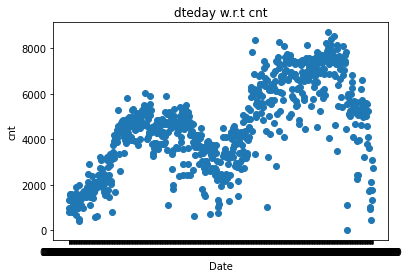

In [11]:
# Since date datatype is not included in the pairplot mapping which will be used later, hence plotting it w.r.t cnt
plt.scatter(bikes.dteday, bikes.cnt)
plt.title("dteday w.r.t cnt")
plt.xlabel("Date")
plt.ylabel("cnt")

<b>Analysis: </b>As per business understanding, since month and year columns are already there in the dataset, deleting the dteday columns i.e. the date column from the dataset and also the plot doesnot show any specific pattern

In [12]:
# Since the date variable doesnot add much value and we already have yr and montg variables in data, dropping this

bikes = bikes.drop('dteday',axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
bikes[['casual','registered','cnt']].corr()

,casual,registered,cnt
casual,1.000000,0.394137,0.672123
registered,0.394137,1.000000,0.945411
cnt,0.672123,0.945411,1.000000


Since the variables are highly correlated to cnt as their sum completely explains the target variable `cnt`, hence dropping these variables as they will not be fruitful for model building

In [14]:
bikes = bikes.drop(['casual','registered'],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Categorical Variable Datatype Conversion

In [15]:
# Converting into object data type for dummy creation of these categorical variables

bikes[["season","mnth","weekday","weathersit"]]=bikes[["season","mnth","weekday","weathersit"]].astype('object')

We are not converting the datatype of variables with binary output of 0/1 like `yr`, `holiday` and `workingday` to categorical although they are categorical variables as for model building numeric datatype is required. No dummy variables required for these

In [16]:
# Checking Datatypes
bikes.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

##  Data Visualisation

As part of data visualization we will plot various indeopndent variables against the target variable, cnt to check if there is a linear relationship of the target variable, cnt with at least one independent variable from the dataset

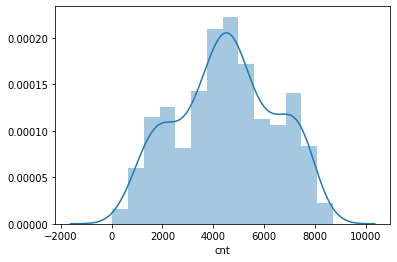

In [17]:
# Checking distriution of demand of bike
sns.distplot(bikes['cnt'])
plt.show()

<b>Analysis: </b> The target variable `cnt` is spread across the complete range evenly

### Visualising Numerical Variables

In [18]:
# All numeric (float and int) variables in the dataset

bikes_num = ['temp', 'atemp','hum', 'windspeed', 'cnt']
bikes[bikes_num].head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 864x576 with 0 Axes>

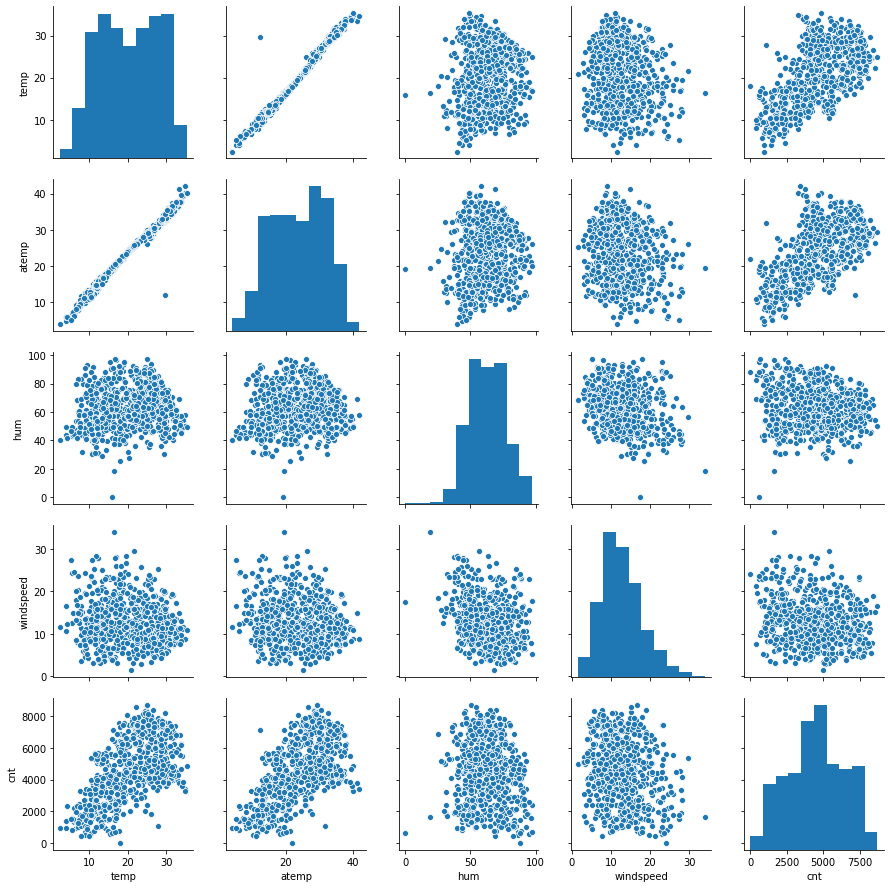

In [19]:
# Pairwise scatter plot of numeric variables from the dataset

plt.figure(figsize=(12, 8))
sns.pairplot(bikes[bikes_num])
plt.show()

<b>Analysis: </b>The above figure shows there are multiple plots that shows linear relationship of `cnt` with other independent variables. So, we can conclude that we can build a linear regression model for this problem. We will explore more plots and determine the relevant variables during further analysis

In [20]:
# All categorical (category) variables in the dataset
bikes_cat = ['season','yr','holiday','workingday','weekday','weathersit','mnth']
bikes[bikes_cat].head()

,season,yr,holiday,workingday,weekday,weathersit,mnth
0,1,0,0,0,6,2,1
1,1,0,0,0,0,2,1
2,1,0,0,1,1,1,1
3,1,0,0,1,2,1,1
4,1,0,0,1,3,1,1


### Visualising Categorical Variables

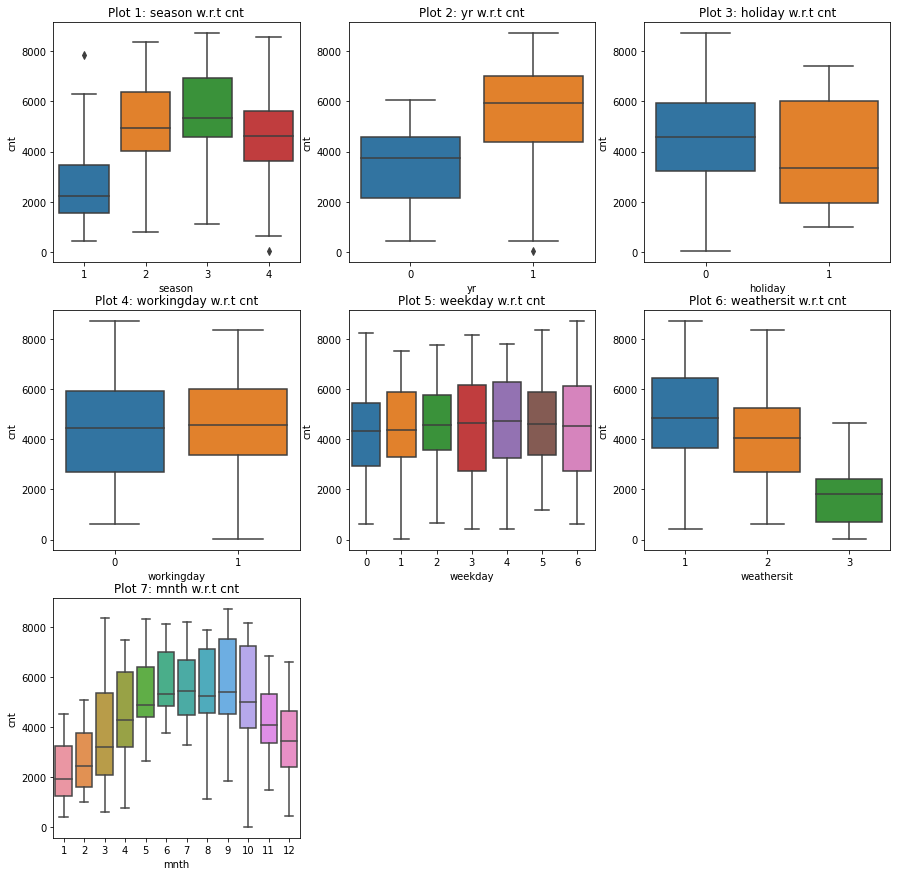

In [21]:
plt.figure(figsize=(15,15))
for i in enumerate(bikes_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],y='cnt',data=bikes)
    plt.title("Plot "+str(i[0]+1)+": "+i[1]+" w.r.t cnt")
plt.show()

<b>Analysis: </b> 
- From 1st plot, we understand that the on an average demand of bikes is least in Spring, the median bike demand looks similar for summer, fall and winter but demand is actually high in winter.
- From 2nd plot, we interpret that bike demand in 2019 is fairly higher than in 2018, the maximum number of bike demand in 2018 is almost equal to the minimum no of bike demand in 2019.
- From 3rd plot, we see that although the average bike demand on a holiday is lower than on a weekday but more people prefer holiday to book/purchase a bike
- From 4th plot, this result is analogous with previous plot result as more people prefer non working day to book their bike, although the average bike demand is same whether its working or non working day
- From 5th plot,we interpret that the average demand i.e. median is same for all the days of the week, although more people book their bike purchase on saturday or wednesday.
- From 6th plot, it can be inferred that people prefer to purchase or book bikes mostly when the weather is Clear, Few clouds, Partly cloudy, Partly cloudy. The average demand is also higher with clear sky
- From 7th plot, we can infer that there is a spike in demand from months April to September with a dip in demand in july, post which the demand again falls, people donot prefer to purchase bikes from October to December.

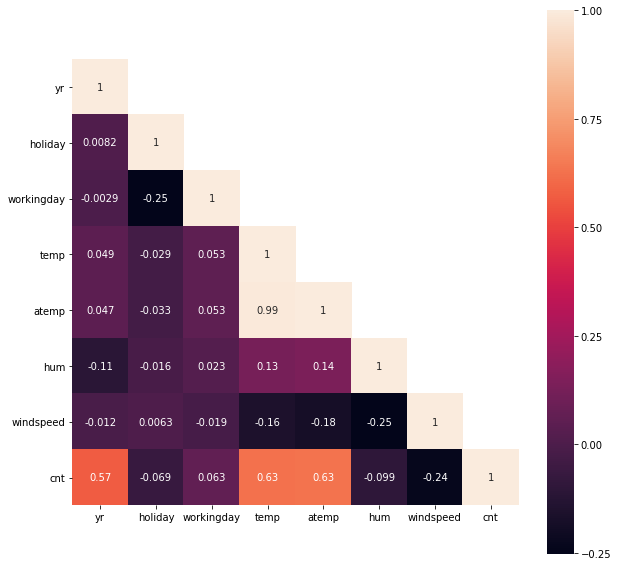

In [22]:
#Plotting a heatmap to visualize the correlations between variables

plt.figure(figsize=(10,10))
corr_mask= bikes[:].corr()
mask = np.array(corr_mask)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(data=corr_mask,mask=mask,square=True,annot=True,cbar=True)

plt.show()

#### Conclusion from the above correlation heatmap

- The dependent variable 'cnt' is highly correlated with the following independent variables
    - atemp
    - temp
    - yr
    
- The dependent variable 'cnt' is negatively correlated with the following independent variables
    - windspeed
    
- Some of the independent variables are correlated among themselves
    - hum
    - temp
    - atemp
    - holiday
    - workingday
    

# 4. Data Preparation for Model Building

## 4.1 Dummy Variables Creation

In [23]:
# A function to map the actual numbers to categorical variables.
def season_map(x):
    return x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

# Applying the function to the season column
bikes['season'] = bikes[['season']].apply(season_map)

In [24]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'dummy_1'
dummy_1 = pd.get_dummies(bikes['season'],drop_first = True)
dummy_1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
# A function to map the actual numbers to categorical variables for dummy creation.
def month_map(x):
    return x.map({1:"january", 2:"february", 3:"march", 4:"april", 5:"may", 6:"june", 7:"july", 8:"august",
                 9:"september",10:"october", 11:"november", 12:"december"})

# Applying the function to the mnth column
bikes['mnth'] = bikes[['mnth']].apply(month_map)

In [26]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'dummy_2'
dummy_2 = pd.get_dummies(bikes['mnth'],drop_first = True)
dummy_2.head()

,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [27]:
# A function to map the actual numbers to categorical variables for dummy creation.
def weekday_map(x):
    return x.map({0:"sunday",1:"monday", 2:"tuesday", 3:"wednesday", 4:"thursday", 5:"friday", 6:"saturday"})

# Applying the function to the weekday column
bikes['weekday'] = bikes[['weekday']].apply(weekday_map)

In [28]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'dummy_3'
dummy_3 = pd.get_dummies(bikes['weekday'],drop_first = True)
dummy_3.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [29]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'dummy_4'
dummy_4 = pd.get_dummies(bikes['weathersit'],prefix="weather",prefix_sep='_',drop_first = True)
dummy_4.head()

,weather_2,weather_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [30]:
# Add the results to the original bikes dataframe

bikes = pd.concat([bikes,dummy_1, dummy_2, dummy_3,dummy_4], axis = 1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_2,weather_3
0,spring,0,january,0,saturday,0,2,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,january,0,sunday,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,january,0,monday,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,january,0,tuesday,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,january,0,wednesday,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# Drop 'season','mnth','weekday' and 'weathersit' as we have created the dummies for these columns

bikes.drop(columns=['weathersit','season','mnth','weekday'], axis = 1, inplace = True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_2,weather_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Checking all columns and their datatypes
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'weather_2', 'weather_3'],
      dtype='object')

In [33]:
# Checking shape of the dataframe
bikes.shape

(730, 30)

So, we arrived at 30 columns and all of these are numerical in nature. This dataframe is good enough for us to go ahead with model building.

## 4.2 Splitting the Data into Training and Testing Sets


In [34]:
# importing the library for test train split
from sklearn.model_selection import train_test_split

# We specify randpm_state as 100 so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

## 4.3 Scaling the numerical variables

It is always advisable to scale all the numerical variables, not the dummy ones, for better redability. We can scale using either StandardScalar or Min-Max Scalar. Min-Max scalar scales the variables between 0 to 1. All the other dummy variables are either 0 or 1. Let us scale the numerical variables using min-max scalar. Also scaling must be done only on the train dataset.

In [35]:
# Import the StandardScaler()
from sklearn.preprocessing import MinMaxScaler

# Create a scaling object
scaler = MinMaxScaler()

In [36]:
# Lets scale all the above numerical variables using fit_transform

df_train[bikes_num] = scaler.fit_transform(df_train[bikes_num])

In [37]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_2,weather_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


As expected, the variables have been appropriately scaled.

In [38]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_2,weather_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


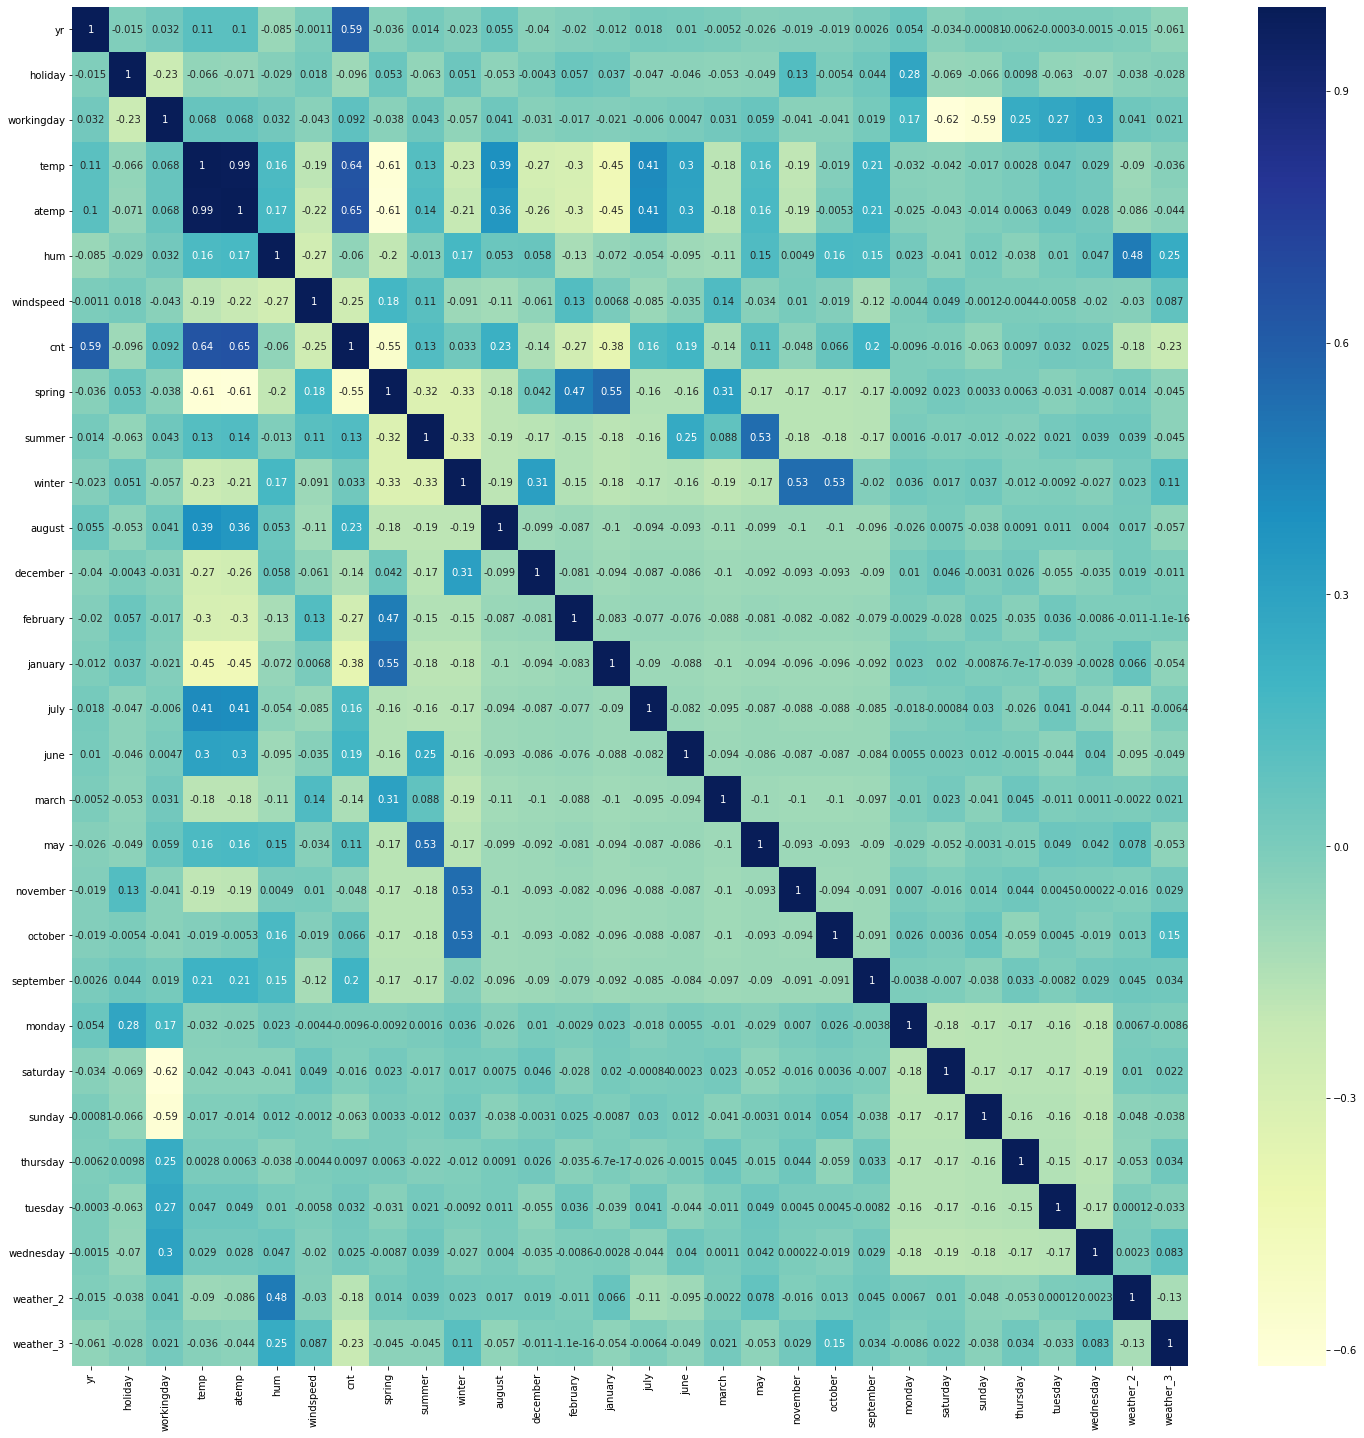

In [39]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<b>Analysis: </b> `temp` and `atemp` seems to the correlated to `cnt` the most followed by `yr`.

## 4.4 Dividing train set into X and y sets

First dividing the train set into X and y, independent and dependent variable list respectively

In [40]:
y_train = df_train.pop('cnt')
X_train = df_train

# 5. Data Modelling

In [41]:
# Importing all libraries required for model building process

# Library to perform linear regression modelling
import statsmodels.api as sm 

# Importing LinearRegression
from sklearn.linear_model import LinearRegression

from sklearn import linear_model

# Importing RFE
from sklearn.feature_selection import RFE

#Importing VIF for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Creating Model 1

Building the first model with all the features.

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, we need to manually use the `add_constant` attribute of `statsmodels`. And once we've added the constant to our `X_train` dataset, we will fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [42]:
# Add a constant to get an intercept
X_train_lm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_1.params

const         0.245237
yr            0.232208
holiday       0.010689
workingday    0.096962
temp          0.401322
atemp         0.050628
hum          -0.151812
windspeed    -0.184388
spring       -0.048580
summer        0.038216
winter        0.105387
august        0.016076
december     -0.045572
february     -0.032176
january      -0.062565
july         -0.039277
june         -0.001704
march         0.001288
may           0.024691
november     -0.041783
october       0.007695
september     0.081806
monday       -0.021502
saturday      0.096059
sunday        0.041527
thursday     -0.009750
tuesday      -0.019308
wednesday    -0.005733
weather_2    -0.061030
weather_3    -0.256697
dtype: float64

In [43]:
# Performing a summary operation to list out all the different parameters of the regression line fitted

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          8.42e-181
Time:                        11:53:12   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.035      6.953      0.0

In [44]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Print the coefficients and intercept
print("Coefficients are: ",lm.coef_)
print()
print("Intercept: ",lm.intercept_)

Coefficients are:  [ 2.32207596e-01  1.15867115e+13  1.15867115e+13  6.04149729e-01
 -1.35876561e-01 -1.33432812e-01 -1.60139535e-01 -1.48153206e-01
 -5.10358539e-02  3.51081874e-02 -1.14242756e-01 -2.34272706e-02
 -6.11241260e-02 -6.70117122e-02 -1.46780381e-01 -3.27649315e-02
  4.80500108e-02 -1.80054335e-02 -8.89413786e-02 -2.53123904e-02
  6.08967661e-03  3.34019660e-02  1.15867115e+13  1.15867115e+13
  5.12714518e-02 -6.37480121e-03  2.60575207e-02 -5.59449340e-02
 -2.63676019e-01]

Intercept:  -11586711522349.322


To start building the model we can start with bottom-up approach or vice versa. But in this case, we have 30 variables which is a high number of variable. Let us use recursive feature elimination or RFE to begin with, say, top 15 variables. After that we will check R-Squared, Adjusted R-Squared, p-value and VIFs of those variables to arrive at our final model

### RFE
Using Recursive feature elimination for initial screening of the variables and then applying mixed model building approach of manual selection after RFE

In [46]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe_15 = RFE(lm, 15)             
rfe_15 = rfe_15.fit(X_train, y_train)

In [47]:
#Listing the variables that's automatically ranked using RFE - all the ones ranked as 1 are considered top 15 variables

list(zip(X_train.columns,rfe_15.support_,rfe_15.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('august', True, 1),
 ('december', False, 2),
 ('february', False, 4),
 ('january', False, 3),
 ('july', True, 1),
 ('june', True, 1),
 ('march', False, 6),
 ('may', False, 14),
 ('november', True, 1),
 ('october', False, 5),
 ('september', False, 15),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', False, 7),
 ('thursday', False, 12),
 ('tuesday', False, 9),
 ('wednesday', False, 13),
 ('weather_2', True, 1),
 ('weather_3', True, 1)]

In [48]:
# Creating a list of the top 15 variables selected by RFE

col = X_train.columns[rfe_15.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'august', 'july', 'june', 'november', 'saturday', 'weather_2',
       'weather_3'],
      dtype='object')

In [49]:
# List of Rejected varaibles by RFE

X_train.columns[~rfe_15.support_]

Index(['atemp', 'summer', 'december', 'february', 'january', 'march', 'may',
       'october', 'september', 'monday', 'sunday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

### Creating Model 2

In [50]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe15 = X_train[col]

In [51]:
# Adding a constant variable  

X_train_rfe15 = sm.add_constant(X_train_rfe15)

In [52]:
# Running the linear model no 2

lr_2 = sm.OLS(y_train,X_train_rfe15).fit()   

In [53]:
# Statistical summary of linear model 2

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.78e-189
Time:                        11:53:12   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     494   BIC:                            -931.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2904      0.033      8.868      0.0

In [54]:
# Dropping the const for VIF calculation

X_train_new = X_train_rfe15.drop(['const'], axis=1)

In [55]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,24.71
3,temp,22.17
2,workingday,5.20
5,windspeed,4.23
7,winter,2.67
6,spring,2.64
13,weather_2,2.25
0,yr,2.07
12,saturday,1.94
9,july,1.79


### Creating Model 3

From the above model, we again arrived at a good R-squared and adjusted R-squared values. But we have 1 variable with high p-value and a few with high VIFs. Let us first remove the variable with high p-value - `november`

In [56]:
# Dropping 'november'

X_train_new = X_train_new.drop(["november"], axis = 1)

Rebuilding the model without `november`

In [57]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [58]:
# Running the linear model 3

lr_3 = sm.OLS(y_train,X_train_lm).fit()   

In [59]:
#Let's see the summary of our linear model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          5.34e-190
Time:                        11:53:12   Log-Likelihood:                 513.88
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     495   BIC:                            -934.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.033      8.724      0.0

In [60]:
# Checking columns 

X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'august', 'july', 'june', 'saturday', 'weather_2',
       'weather_3'],
      dtype='object')

In [61]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,24.67
3,temp,21.91
2,workingday,5.19
5,windspeed,4.18
6,spring,2.62
12,weather_2,2.24
7,winter,2.16
0,yr,2.07
11,saturday,1.94
9,july,1.78


### Creating Model 4

`hum` is insignificant in presence of other variables as it has high VIF as compared to others

In [62]:
# Dropping 'hum'

X_train_new = X_train_new.drop(["hum"], axis = 1)

Rebuilding the model without `hum`

In [63]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [64]:
# Running the linear model 4

lr_4 = sm.OLS(y_train,X_train_lm).fit()   

In [65]:
#Let's see the summary of our linear model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.66e-187
Time:                        11:53:12   Log-Likelihood:                 504.11
No. Observations:                 510   AIC:                            -980.2
Df Residuals:                     496   BIC:                            -920.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1944      0.026      7.529      0.0

In [66]:
# Checking columns 

X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'winter',
       'august', 'july', 'june', 'saturday', 'weather_2', 'weather_3'],
      dtype='object')

In [67]:
# Calculate the VIFs for the new model 4

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,9.37
2,workingday,5.00
4,windspeed,4.18
0,yr,2.06
10,saturday,1.91
5,spring,1.90
7,august,1.66
8,july,1.66
6,winter,1.65
11,weather_2,1.56


### Creating Model 5

`holiday` is insignificant in presence of other variables as it has high p-value as compared to others

In [68]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

Rebuilding the model without `holiday`

In [69]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [70]:
# Running the linear model 5

lr_5 = sm.OLS(y_train,X_train_lm).fit()   

In [71]:
#Let's see the summary of our linear model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.61e-187
Time:                        11:53:12   Log-Likelihood:                 501.91
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     497   BIC:                            -922.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1870      0.026      7.288      0.0

In [72]:
# Checking columns

X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'spring', 'winter', 'august',
       'july', 'june', 'saturday', 'weather_2', 'weather_3'],
      dtype='object')

In [73]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.88
1,workingday,4.48
3,windspeed,4.16
0,yr,2.06
4,spring,1.84
9,saturday,1.79
6,august,1.65
7,july,1.65
5,winter,1.62
10,weather_2,1.56


### Creating Model 6

`june` is insignificant in presence of other variables as it has high p-value as compared to others

In [74]:
# Dropping 'june'

X_train_new = X_train_new.drop(["june"], axis = 1)

Rebuilding the model without `june`

In [75]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [76]:
# Running the linear model 6
lr_6 = sm.OLS(y_train,X_train_lm).fit()  

In [77]:
#Let's see the summary of our linear model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.41e-187
Time:                        11:53:12   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1932      0.026      7.540      0.0

In [78]:
# Checking columns

X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'spring', 'winter', 'august',
       'july', 'saturday', 'weather_2', 'weather_3'],
      dtype='object')

In [79]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.21
1,workingday,4.47
3,windspeed,4.14
0,yr,2.06
4,spring,1.82
8,saturday,1.79
9,weather_2,1.54
5,winter,1.52
6,august,1.45
7,july,1.44


### Creating Model 7

Here we cannot delete the `temp` variable although it has high VIF as dropping this will drastically reducing the R square value of the model thus we understand that its a major predictor variable for model building and hence cannot be dropped.

`workingday` is insignificant in presence of other variables as it has high VIF as compared to others

In [80]:
#Dropping 'workingday'

X_train_new = X_train_new.drop(["workingday"], axis = 1)

Rebuilding the model without `workingday`

In [81]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [82]:
# Running the linear model 7

lr_7 = sm.OLS(y_train,X_train_lm).fit()   

In [83]:
#Let's see the summary of our linear model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.87e-183
Time:                        11:53:12   Log-Likelihood:                 487.12
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     499   BIC:                            -905.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2371      0.025      9.651      0.0

In [84]:
# Checking columns

X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'august', 'july',
       'saturday', 'weather_2', 'weather_3'],
      dtype='object')

In [85]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.25
2,windspeed,4.05
0,yr,2.06
3,spring,1.65
8,weather_2,1.51
4,winter,1.46
5,august,1.45
6,july,1.43
7,saturday,1.18
9,weather_3,1.08


### Creating Model 8

`august` is insignificant in presence of other variables as it has high p-value as compared to others

In [86]:
# Dropping august

X_train_new = X_train_new.drop(["august"], axis = 1)

Rebuilding the model without `august`

In [87]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [88]:
# Running the linear model 8

lr_8 = sm.OLS(y_train,X_train_lm).fit()   

In [89]:
#Let's see the summary of our linear model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     263.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.70e-183
Time:                        11:53:12   Log-Likelihood:                 483.86
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     500   BIC:                            -905.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2455      0.024     10.035      0.0

In [90]:
# Checking columns

X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'july', 'saturday',
       'weather_2', 'weather_3'],
      dtype='object')

In [91]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.23
2,windspeed,3.98
0,yr,2.06
3,spring,1.64
7,weather_2,1.51
4,winter,1.39
5,july,1.31
6,saturday,1.18
8,weather_3,1.08


### Creating Model 9

`saturday` is insignificant in presence of other variables as it has high p-value as compared to others

In [92]:
X_train_new = X_train_new.drop(["saturday"], axis = 1)

Rebuilding the model without `saturday`

In [93]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [94]:
# Running the linear model 9

lr_9 = sm.OLS(y_train,X_train_lm).fit()  

In [95]:
#Let's see the summary of our linear model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     293.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.04e-183
Time:                        11:53:12   Log-Likelihood:                 481.89
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     501   BIC:                            -907.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2491      0.024     10.177      0.0

In [96]:
# Checking columns

X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'july', 'weather_2',
       'weather_3'],
      dtype='object')

In [97]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.19
2,windspeed,3.95
0,yr,2.06
3,spring,1.63
6,weather_2,1.51
4,winter,1.38
5,july,1.31
7,weather_3,1.08


### Creating Model 10

`windspeed` is insignificant in presence of other variables as it has high VIF after temp as compared to others

In [98]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

Rebuilding the model without `windspeed`

In [99]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [100]:
# Running the linear model 10

lr_10 = sm.OLS(y_train,X_train_lm).fit()  

In [101]:
#Let's see the summary of our linear model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     310.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.25e-178
Time:                        11:53:12   Log-Likelihood:                 465.19
No. Observations:                 510   AIC:                            -914.4
Df Residuals:                     502   BIC:                            -880.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1863      0.023      8.214      0.0

In [102]:
# Checking columns

X_train_new.columns

Index(['yr', 'temp', 'spring', 'winter', 'july', 'weather_2', 'weather_3'], dtype='object')

In [103]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.72
0,yr,2.05
5,weather_2,1.50
3,winter,1.32
4,july,1.29
2,spring,1.21
6,weather_3,1.06


This model seems to be a good fit model with optimum variables: 

- <b>Test-statistic check:</b> p-value of all the variables is almost 0 making all the coefficients significant.
- <b>Multicollinearity Check:</b> The VIF of all features is less than 3, which makes model mostly free from multicollinearity
- <b>F-statistic Check :</b> High f static or lower p of fstatic show the overall model fit and lower p value proves that it's not just luck but truly the predictors are able to explain the variance
- <b>R square & Adjusted R square</b> values are good

# 8 Model Evaluation

## 8.1 Making Predictions Using the Final Model

We have already fitted the model and checked the normality of error terms, now we make predictions

### Applying the scaling on the test sets

In [104]:
# We already have numerical columns list in the variable bikes_num

df_test[bikes_num] = scaler.transform(df_test[bikes_num])

In [105]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weather_2,weather_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [106]:
y_test = df_test.pop('cnt')
X_test = df_test

In [107]:
# Adding constant variable to test dataframe
X_test_m10 = sm.add_constant(X_test)

In [108]:
# Creating X_test_m10 dataframe by dropping variables from X_test_m10

X_test_m10 = X_test_m10.drop(['windspeed','holiday', 'workingday', 'atemp', 'hum', 'summer', 'august', 'december',
                            'february', 'january', 'june', 'march', 'may', 'november',
                            'october', 'september', 'monday', 'saturday', 'sunday', 'thursday',
                            'tuesday', 'wednesday', ], axis = 1)

In [109]:
X_test_m10.head()

,const,yr,temp,spring,winter,july,weather_2,weather_3
184,1.0,0,0.831783,0,0,1,1,0
535,1.0,1,0.901354,0,0,0,0,0
299,1.0,0,0.511964,0,1,0,1,0
221,1.0,0,0.881625,0,0,0,0,0
152,1.0,0,0.817246,0,0,0,0,0


In [110]:
# Making predictions using the tenth model

y_pred_m10 = lr_10.predict(X_test_m10)

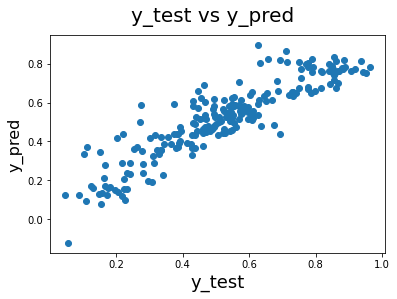

In [111]:
# Plot the graph for actual versus predicted values i.e. y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m10)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

<b>Analysis: </b>
- From the above plot, it's evident that the model is doing well on the test set as well. 
- This result will also be completed by the R square and Adjusted R Square Values of Test Data Set

### Checking the correlations between the final predictor variables

In [112]:
final_col = list(X_test_m10.columns)
final_col.remove('const')
final_col

['yr', 'temp', 'spring', 'winter', 'july', 'weather_2', 'weather_3']

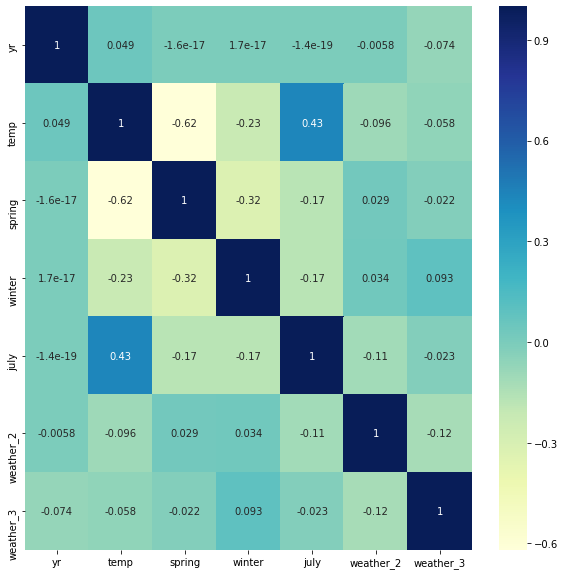

In [113]:
# Figure size
plt.figure(figsize=(10,10))

# Heatmap
sns.heatmap(bikes[final_col].corr(),cmap="YlGnBu", annot=True)
plt.show()

There is little bit more  correlation between temp & spring and temp & july. The VIF of `temp` is higher than `spring` and `july` but `temp` shows the highest significant correlation with `cnt` and hence we will not be moving forward with any variable dropping or removal 

Thus, for now, the final model consists of the 7 variables mentioned above.

### Multiple Linear Regression Model Equation of best fitted line is :

$cnt =  0.186 + 0.493 \times temp  + 0.233 \times yr - 0.291 \times weather\_3 - 0.115 \times spring  - 0.08 \times july - 0.076 \times weather\_2 + 0.053 \times winter $

## 8.2 Checking Linear Regression Assumptions

### 8.2.1. Linearity Assumption

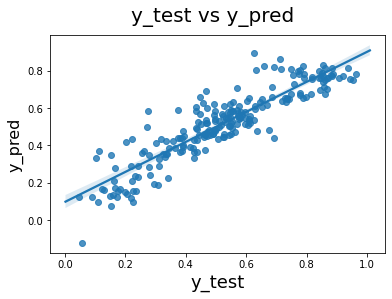

In [114]:
# Plot the graph for actual versus predicted values i.e. y_test and y_pred to understand the spread

fig = plt.figure()
#plt.scatter(y_test, y_pred_m10)
sns.regplot(y_test, y_pred_m10)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

<b>Analysis: </b> This plot above shows the linear relationship with the fitted straight line.

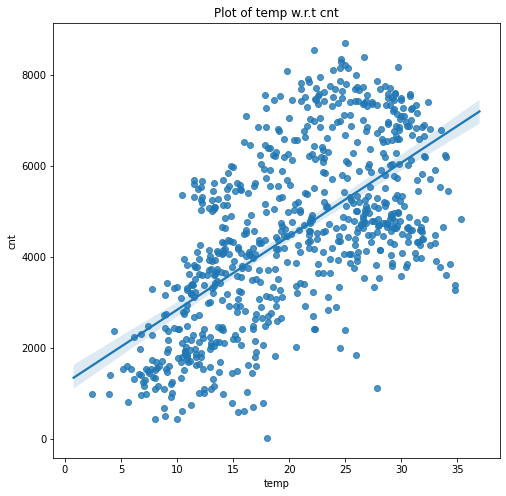

In [115]:
# Showing the linear relationship with numeric coefficients of the model using scatter plot
plt.figure(figsize=(8,8))
sns.regplot(x='temp',y='cnt',data=bikes)
plt.title("Plot of temp w.r.t cnt")
plt.show()

<b>Analysis: </b> Atleast 1 of the feature variables `temp` checked shows perfect linear positive correlation with the demand variable, hence linearity assumption is satisfied.

### 8.2.2. Residual Analysis of Error Terms

Here Residual Analysis of the train data is performed <br>
So, now to check the major assumptions of linear regression i.e. error terms are normally distributed, plotting the histogram of the error terms and see what it looks like.

In [116]:
# Creating a variable for predicted value of 'cnt'

y_train_cnt = lr_10.predict(X_train_lm)

#### 8.2.2.1 Normal Distribution Assumption

Text(0.5, 0, 'Errors')

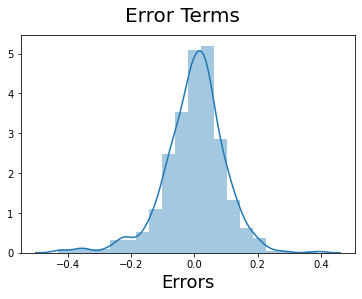

In [117]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b>Analysis: </b>This plot shows that the error terms are normally distributed

#### 8.2.2.2 Zero mean assumption

In [118]:
# Calculating mean of error terms

round(abs(np.mean(y_train - y_train_cnt)),5)

0.0

<b>Analysis: </b> This shows that the error terms have a mean value of almost 0

#### 8.2.2.3 Independent Error Assumption

In [119]:
# Checking autocorrelation of residuals

from statsmodels.stats.stattools import durbin_watson
t = durbin_watson(y_train - y_train_cnt)
r=1-(t/2)
round(r)

0.0

<b>Analysis: </b> This shows that the sample correlation is almost 0 showing that residual terms are independent of each other

### 8.2.3 Multicollinearity Check

Variance inflation factor (VIF) is used to check the presence of multicollinearity in a data set. It is calculated as: 
 
### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [120]:
# Checking the multi-collinearity of the model coefficients by Variable Inflation Factor
vif 

,Features,VIF
1,temp,2.72
0,yr,2.05
5,weather_2,1.50
3,winter,1.32
4,july,1.29
2,spring,1.21
6,weather_3,1.06


<b>Analysis: </b>The table above depicts very well that all the coefficients' VIF is less than 3 hence the model can be considered free of multicollinearity

## 8.3 R Square & Adjusted R Square Calculations

In [121]:
# r2_score for 7 variables
from sklearn.metrics import r2_score,mean_squared_error

R_square=r2_score(y_test, y_pred_m10)

print("\nTest Data R squared value: ",R_square)


Test Data R squared value:  0.8076386623097824


In [122]:
# Adjusted R2 calculation for test set
# n=number of observations ; k=number of parameters
n=len(y_test.index)
k=len(vif)
Adj_rsqr = R_square - ((k-1)*(1-R_square))/(n-k)
print("\nTest Data Adjusted R squared value: ",Adj_rsqr)


Test Data Adjusted R squared value:  0.8021944735072291


In [1]:
MSE=mean_squared_error(y_test, y_pred_m10)
print("\nMean Square Error: ",MSE)

NameError: name 'metrics' is not defined

<b>Analysis: </b>
- Thus, for the model with 7 variables, the <b>r-squared</b> on training and test data is about 81.2% and 80.76% respectively. 
- The <b>adjusted r-square</b> on the train and test data set is about is about 81% and 80.2%.
- From the first model with 15 variables and R squared value of 85.3% to the optimized model with 7 variables with R squared value 81.2% , there haven't been much drop in R square value but we have simplified the model as less variables explains the model better
- MSE of 0.9% states that only 0.9% of the data remains unexplained with this model which means its very well explained

#### Model Equation:

In [124]:
# The below commands display the equation of the Final model built

# Creating a dictionary of the model parameters
param_dict=lr_10.params.to_dict()

s=''
for i,v in param_dict.items():
    if i != 'const':
        s = s + ' + (' + str(i)+' x ' + str(round(v,3))+')' 
    else:
        s = str(round(v,3))
print("\nMultiple Linear Regression Model Equation of the best fitted line is : \n")
print("cnt = ",s)


Multiple Linear Regression Model Equation of the best fitted line is : 

cnt =  0.186 + (yr x 0.233) + (temp x 0.493) + (spring x -0.115) + (winter x 0.053) + (july x -0.08) + (weather_2 x -0.076) + (weather_3 x -0.291)


## 8.4 Reporting the Model

### Multiple Linear Regression Model Equation of our best fitted line is :

$cnt =  0.186 + 0.493 \times temp  + 0.233 \times yr - 0.291 \times weather\_3 - 0.115 \times spring  - 0.08 \times july - 0.076 \times weather\_2 + 0.053 \times winter $

<b>Interpretation of features w.r.t target variable: </b>
The above equation depicts the variables that mostly impact the demand variable `cnt` are:

- Temperature (+ve impact)
- Year (+ve impact)
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather (-ve impact)
- Spring Season (-ve impact)
- July Month (-ve impact)
- Mist + Cloudy, Mist + Broken clouds i.e. Mist weather (-ve impact)
- Winter Season (+ve impact)

<b>Business Report:</b>

- With the increasing temperature , the bike demand increases as it is favourable 
- Every year the bike demand keeps on increasing as the demand in 2019 is fairly higher than 2018, this shows the bike demand market is increasing year on year.
- People donot prefer to purchase bikes in the spring season but they buy more during Winter season possibly they want to keep it ready before summer comes.
- In july month people donot prefer to purchase bikes i.e. demand of bikes goes down possibly due to rain in this month to avoid accidents.
- The bike demand decreases when the weather is not clear sky. Hence either when weather is Mist Cloudy, Mist Broken Clouds or Light Snow, Light Rain, people donot prefer new bike purchases. Clear weather is required to drive bike and avoid accidents.